Importando dados do [The Economist’s Big Mac index](https://github.com/TheEconomist/big-mac-data)

In [96]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import requests
import io

In [97]:
url = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-raw-index.csv'
url_full = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv'
content = requests.get(url).content

data = pd.read_csv(io.StringIO(content.decode('utf-8')), delimiter=',')
data.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
0,2000-04-01,ARG,ARS,Argentina,2.50,1.000000,2.500000,-0.004,0.050,-0.167,-0.099,1.091
1,2000-04-01,AUS,AUD,Australia,2.59,1.680000,1.541667,-0.386,-0.352,-0.486,-0.444,0.289
2,2000-04-01,BRA,BRL,Brazil,2.95,1.790000,1.648045,-0.343,-0.308,-0.451,-0.406,0.378
3,2000-04-01,GBR,GBP,Britain,1.90,0.632911,3.002000,0.196,0.261,0.000,0.082,1.511
4,2000-04-01,CAN,CAD,Canada,2.85,1.470000,1.938776,-0.228,-0.186,-0.354,-0.301,0.622


In [98]:
data['date'] = data['date'].astype('datetime64[ns]')

In [99]:
data.dtypes

date             datetime64[ns]
iso_a3                   object
currency_code            object
name                     object
local_price             float64
dollar_ex               float64
dollar_price            float64
USD                     float64
EUR                     float64
GBP                     float64
JPY                     float64
CNY                     float64
dtype: object

## Filtrando os dados para um recorte igual ao apresentado na visualização base

In [100]:
data = data.loc[(data['date']=='2017-07-01') | (data['date']=='2018-01-01')].\
        sort_values(['local_price', 'date'], ascending=True)
    
# quantidade de moeda local que eu preciso para representar 1 dólar
data.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY
1023,2017-07-01,GBR,GBP,Britain,3.19,0.775885,4.111432,-0.224,-0.079,0.000,0.223,0.409
1066,2018-01-01,GBR,GBP,Britain,3.19,0.722857,4.413046,-0.164,-0.087,0.000,0.286,0.391
1032,2017-07-01,EUZ,EUR,Euro area,3.91,0.875695,4.465024,-0.158,0.000,0.086,0.328,0.531
1075,2018-01-01,EUZ,EUR,Euro area,3.95,0.816827,4.835787,-0.084,0.000,0.096,0.409,0.525
1103,2018-01-01,USA,USD,United States,5.28,1.000000,5.280000,0.000,0.092,0.196,0.538,0.665


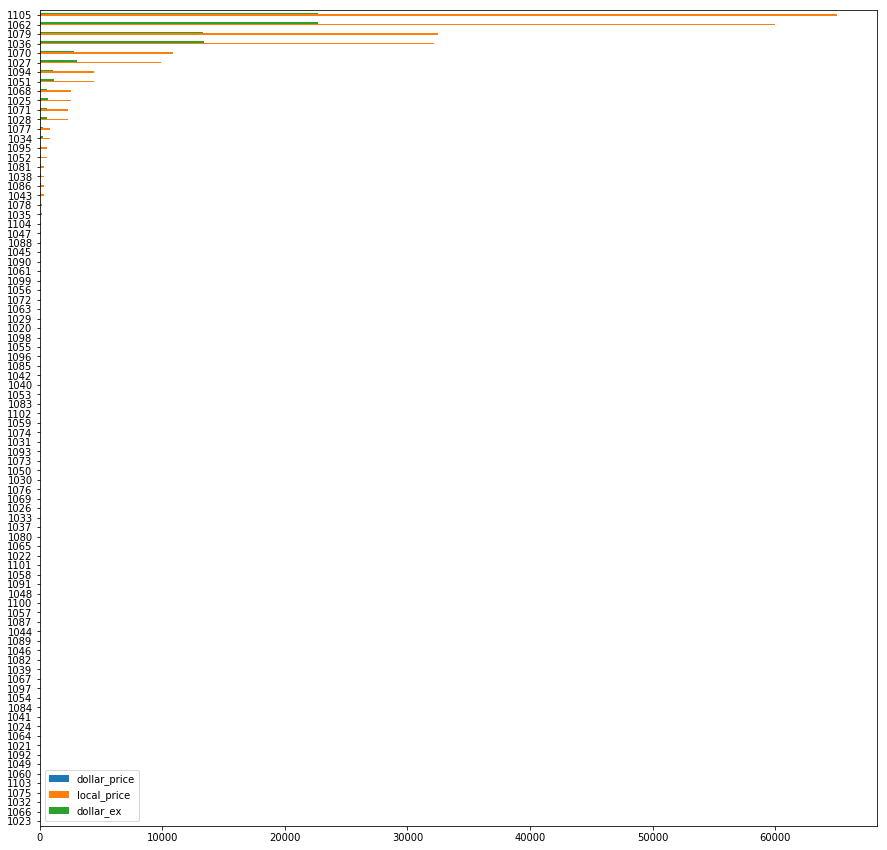

In [144]:
data_a = data[['name', 'dollar_price', 'local_price', 'dollar_ex']]
data_a
data_a.plot(kind='barh')

In [101]:
data['diff_dollar_price'] = data.groupby('name')['dollar_price'].diff()
data['diff_local_price'] = data.groupby('name')['local_price'].diff()
data['diff_dollar_ex'] = data.groupby('name')['dollar_ex'].diff()

In [102]:
data.head(15)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD,EUR,GBP,JPY,CNY,diff_dollar_price,diff_local_price,diff_dollar_ex
1023,2017-07-01,GBR,GBP,Britain,3.19,0.775885,4.111432,-0.224,-0.079,0.000,0.223,0.409,NaN,NaN,NaN
1066,2018-01-01,GBR,GBP,Britain,3.19,0.722857,4.413046,-0.164,-0.087,0.000,0.286,0.391,0.301614,0.00,-0.053029
1032,2017-07-01,EUZ,EUR,Euro area,3.91,0.875695,4.465024,-0.158,0.000,0.086,0.328,0.531,NaN,NaN,NaN
1075,2018-01-01,EUZ,EUR,Euro area,3.95,0.816827,4.835787,-0.084,0.000,0.096,0.409,0.525,0.370763,0.04,-0.058868
1103,2018-01-01,USA,USD,United States,5.28,1.000000,5.280000,0.000,0.092,0.196,0.538,0.665,NaN,NaN,NaN
1060,2017-07-01,USA,USD,United States,5.30,1.000000,5.300000,0.000,0.187,0.289,0.577,0.817,0.020000,0.02,0.000000
1049,2017-07-01,SGP,SGD,Singapore,5.60,1.377700,4.064746,-0.233,-0.090,-0.011,0.209,0.393,NaN,NaN,NaN
1092,2018-01-01,SGP,SGD,Singapore,5.80,1.322550,4.385467,-0.169,-0.093,-0.006,0.278,0.383,0.320722,0.20,-0.055150
1021,2017-07-01,AUS,AUD,Australia,5.90,1.303016,4.527955,-0.146,0.014,0.101,0.347,0.552,NaN,NaN,NaN
1064,2018-01-01,AUS,AUD,Australia,5.90,1.253683,4.706135,-0.109,-0.027,0.066,0.371,0.484,0.178180,0.00,-0.049334


In [109]:
diff = data[['name', 'diff_dollar_price', 'diff_local_price', 'diff_dollar_ex']]
diff = diff.fillna(0)
diff.head()

,name,diff_dollar_price,diff_local_price,diff_dollar_ex
1023,Britain,0.000000,0.00,0.000000
1066,Britain,0.301614,0.00,-0.053029
1032,Euro area,0.000000,0.00,0.000000
1075,Euro area,0.370763,0.04,-0.058868
1103,United States,0.000000,0.00,0.000000


In [111]:
diff = diff.groupby('name').sum()

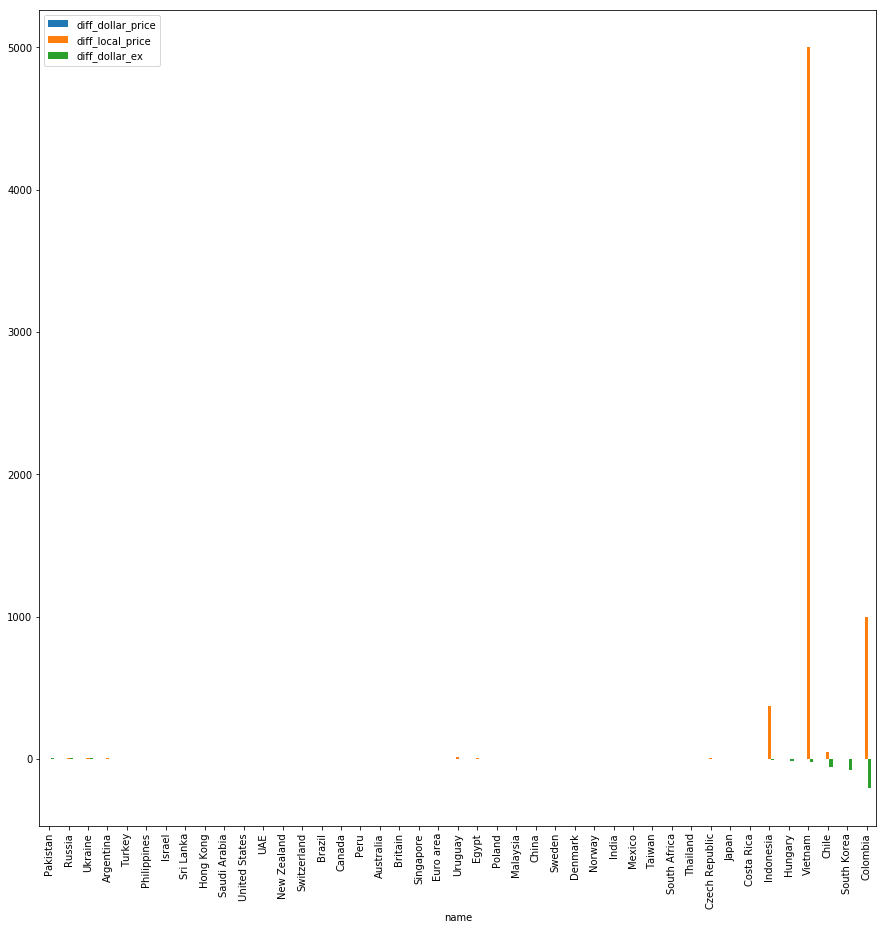

In [142]:
plt.rcParams['figure.figsize'] = (15, 15)
diff.plot(kind='bar')

## Normalizando os valores para gerar a visualização

In [106]:
numeric_features = diff.dtypes[diff.dtypes != "object"].index
numeric_features
log_diff = diff
log_diff[numeric_features] = np.log1p(log_diff[numeric_features])
log_diff.head()

/home/lsp/anaconda2/envs/notebookEnv/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


,diff_dollar_price,diff_local_price,diff_dollar_ex
name,,,
Argentina,-0.180489,1.791759,1.088562
Australia,0.163971,0.000000,-0.050592
Brazil,0.010064,0.000000,-0.006421
Britain,0.263605,0.000000,-0.054487
Canada,0.470970,0.457425,-0.037079


## Visualização final utilizando os valores normalizados para gerar a visualização

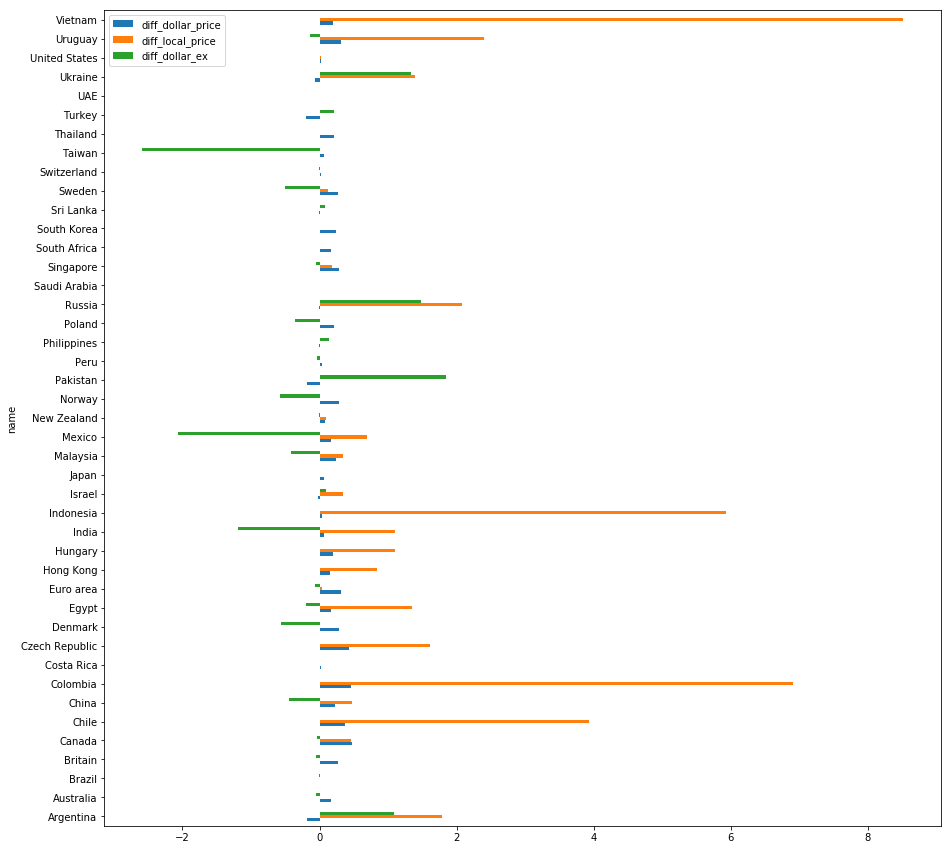

In [145]:
plt.rcParams['figure.figsize'] = (15, 15)
log_diff.plot(kind='barh')

In [40]:
data.to_csv('dados/analise_bigmac_2017_2018.csv')

In [118]:
diff.to_csv('dados/analise_bigmac_diff_2017_2018.csv')